In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np
tfd = tf.contrib.distributions
import matplotlib.pyplot as plt
import pandas as pd

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### First we defined the functions to be used.

## Defining Encoder and Decoder

As stated in the exercise sheet, encoder consists of 2 hidden layers with size 256 and decoder consists of 2 hidden layers with size 256. 
As activation function, ReLU is used as stated in exercise sheet. 

In [2]:
def encoder(X_in):
    hidden1 = tf.layers.dense(X_in, hidden_dimension, activation)
    hidden2 = tf.layers.dense(hidden1, hidden_dimension, activation)
    mu = tf.layers.dense(hidden2, latent_dimension)
    L = tf.layers.dense(hidden2, latent_dimension)
    return mu, L

In [3]:
def sample_data(mu, L, batch_size):
    epsilon = tf.random.normal([batch_size,latent_dimension], 0, 1, dtype = 'float64')
    z = mu + L * epsilon
    return z

In [4]:
def decoder(sample_data):
    hidden1 = tf.layers.dense(sample_data, hidden_dimension, activation)
    hidden2 = tf.layers.dense(hidden1, hidden_dimension, activation)
    output = tf.layers.dense(hidden2, input_dimension, tf.nn.sigmoid)
    return output

## Loss Function

In order to implement the loss function, we divided the loss function into two, as reconstruction loss and KL Divergence loss as regularization loss.

In [5]:
def prior_z(latent_dimension):
    prior = tfd.MultivariateNormalDiag(np.zeros(latent_dimension), np.ones(latent_dimension))
    return prior

In [6]:
def posterior(mu, L):
    posterior_dist = tfd.MultivariateNormalDiag(mu, L)
    return posterior_dist

In [7]:
def likelihood(output_mean, sigma):
    likelihood_dist = tfd.MultivariateNormalDiag(output_mean, scale_identity_multiplier = sigma, scale_diag = None)
    
    return likelihood_dist

In [8]:
def kl_divergence(p,q):
    kl = tf.distributions.kl_divergence(p,q)
    return kl 

In [9]:
def reconstruction_loss(input_data, output_mean):
    loss = tf.math.squared_difference(input_data, output_mean)
    loss = tf.reduce_sum(loss)
    loss = loss / 2
    return loss

## Creating Batch

In [10]:
def create_batch(train_x):
    batches = []
    batches_y = []
    index_list = np.arange(train_x.shape[0])
    np.random.shuffle(index_list)
    s = int((train_x.shape[0]) / batch_size)
    for i in range(0, s):
        loc = i * batch_size
        batch_indices = index_list[loc:loc+batch_size]
        batch = train_x[batch_indices]
        batches.append(batch)
    return batches

In [11]:
def create_batch_test(test_x):
    batches = []
    batches_y = []
    index_list = np.arange(test_x.shape[0])
    np.random.shuffle(index_list)
    s = int((test_x.shape[0]) / batch_size)
    for i in range(0, s):
        loc = i * batch_size
        batch_indices = index_list[loc:loc+batch_size]
        batch_x = test_x[batch_indices]
        batches.append(batch_x)
    
    return batches[0]

## Visualization Methods

In [12]:
def print_loss(loss_history):
    for i in range(0, len(loss_history)):
        plt.scatter(i,loss_history[i])
    plt.show()

## Defining parameters

In [13]:
# defining parameters
activation = tf.nn.relu 
learning_rate = 0.01
epoch = 185
batch_size = 128
hidden_dimension = 256
latent_dimension = 2
input_dimension = 2

X_in = tf.placeholder(dtype=tf.float64, shape=[None, input_dimension], name='X')
sigma = tf.Variable(tf.random_uniform(shape = [],dtype=tf.float64), shape = [], dtype=tf.float64,trainable = True)

## Defining model & loss

In [14]:
# Define the model.
encoder_mu_L = encoder(X_in)
posterior_dist = posterior(encoder_mu_L[0], encoder_mu_L[1])
prior = prior_z(latent_dimension)

# create z
sample = sample_data(encoder_mu_L[0], encoder_mu_L[1], batch_size)

output_mean = decoder(sample)

# Defining the losses
kl_div = kl_divergence(posterior_dist, prior)
likelihood_dist = likelihood(output_mean, sigma)

reconst_loss = likelihood_dist.log_prob(X_in)
loss = tf.reduce_mean(reconst_loss - kl_div)

#define optimizer
optimize = tf.train.AdamOptimizer(learning_rate).minimize(-loss)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). Y

## Loading Data
Now that we have defined the functions, we can load the data.

In [15]:
X_train = np.load("FireEvac_train_set.npy")
X_test = np.load("FireEvac_test_set.npy")

In [16]:
df_train = pd.DataFrame(X_train)
df_train = df_train - df_train.mean(axis=0) # centering
df_train = df_train.to_numpy()

df_test = pd.DataFrame(X_test)
df_test = df_test - df_test.mean(axis=0) # centering
df_test = df_test.to_numpy()

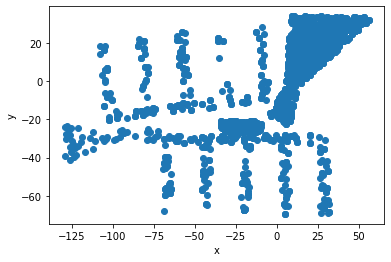

In [17]:
plt.scatter(df_train[:,0], df_train[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [18]:
df_train.shape[0]

3000

## Training

[TEST] Epoch:  1 , Loss:    -1180.6291805108795 , Reconstruction loss:    -1150.9398063069366 , KL Divergence:    29.689374203942897


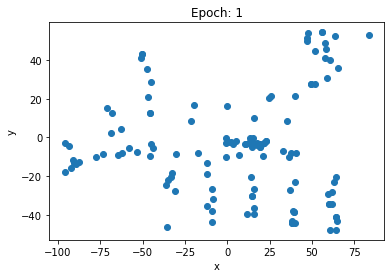

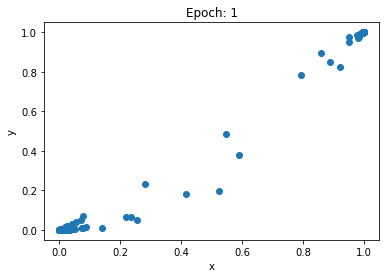

[TRAIN] Epoch:  1 , Batch:  0 , Loss:    -805.8001602983836 , Reconstruction loss:    -794.8045063695066 , KL Divergence:    10.995653928877063
[TEST] Epoch:  5 , Loss:    -562.4096524469285 , Reconstruction loss:    -560.0998440803132 , KL Divergence:    2.309808366615322


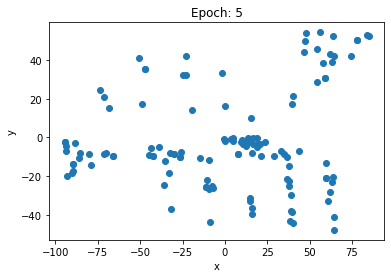

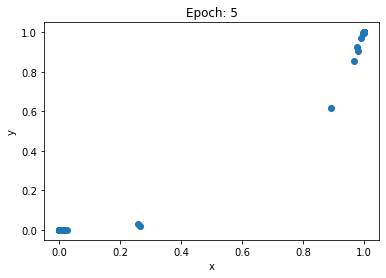

[TRAIN] Epoch:  5 , Batch:  0 , Loss:    -305.878523670147 , Reconstruction loss:    -304.5122225556298 , KL Divergence:    1.36630111451717
[TEST] Epoch:  25 , Loss:    -198.04299878816317 , Reconstruction loss:    -197.16716213669855 , KL Divergence:    0.8758366514645899


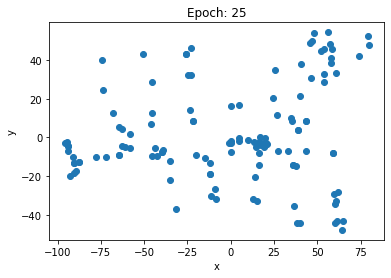

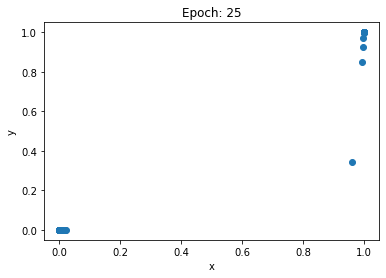

[TRAIN] Epoch:  25 , Batch:  0 , Loss:    -123.05198013526692 , Reconstruction loss:    -122.40440362350539 , KL Divergence:    0.6475765117615231
[TEST] Epoch:  50 , Loss:    -107.96904271024135 , Reconstruction loss:    -107.21723370309701 , KL Divergence:    0.7518090071443484


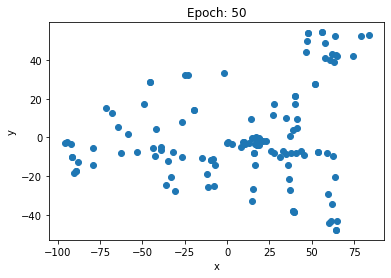

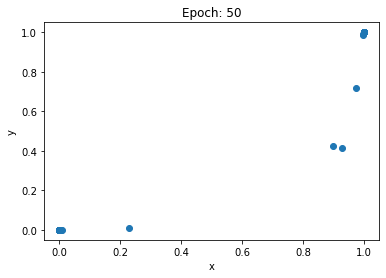

[TRAIN] Epoch:  50 , Batch:  0 , Loss:    -73.35142490821724 , Reconstruction loss:    -72.81583565428944 , KL Divergence:    0.535589253927789
[TEST] Epoch:  75 , Loss:    -76.71067736891109 , Reconstruction loss:    -76.1292757165414 , KL Divergence:    0.5814016523696983


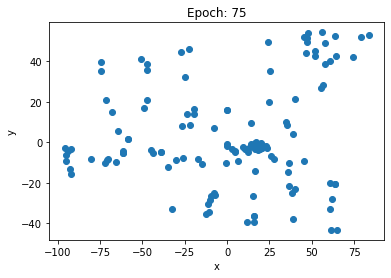

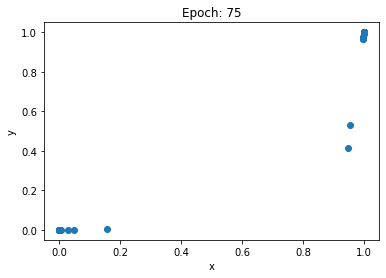

[TRAIN] Epoch:  75 , Batch:  0 , Loss:    -56.9737724488445 , Reconstruction loss:    -56.589753069569966 , KL Divergence:    0.3840193792745292
[TEST] Epoch:  90 , Loss:    -65.0071645790392 , Reconstruction loss:    -64.35850390248157 , KL Divergence:    0.6486606765576222


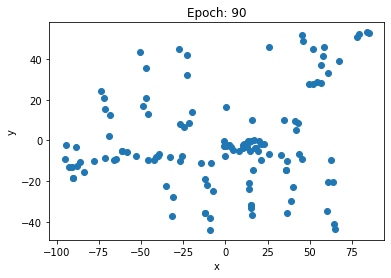

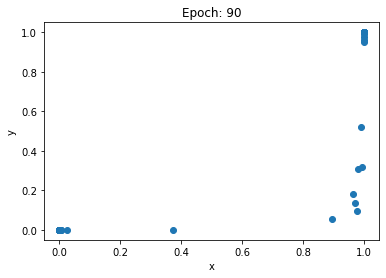

[TRAIN] Epoch:  90 , Batch:  0 , Loss:    -43.055574637931414 , Reconstruction loss:    -42.730096120115675 , KL Divergence:    0.32547851781573456
[TEST] Epoch:  120 , Loss:    -49.362870170257445 , Reconstruction loss:    -48.72113120759807 , KL Divergence:    0.6417389626593708


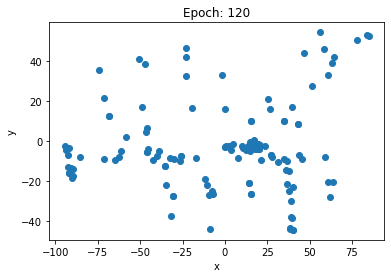

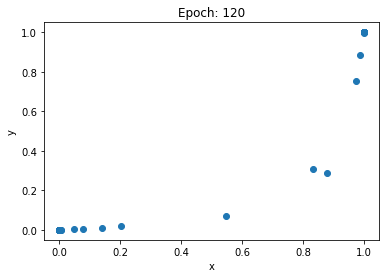

[TRAIN] Epoch:  120 , Batch:  0 , Loss:    -30.713649856615874 , Reconstruction loss:    -30.519399458085374 , KL Divergence:    0.19425039853050258
[TEST] Epoch:  150 , Loss:    -44.81758051205117 , Reconstruction loss:    -44.369898845996545 , KL Divergence:    0.44768166605464266


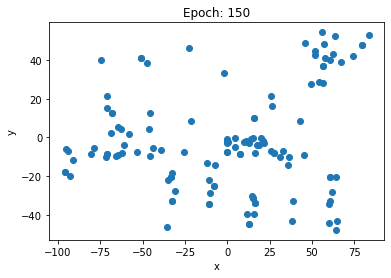

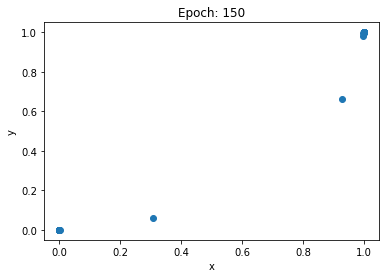

[TRAIN] Epoch:  150 , Batch:  0 , Loss:    -27.85901284070284 , Reconstruction loss:    -27.733951543163336 , KL Divergence:    0.12506129753950435
[TEST] Epoch:  180 , Loss:    -35.39630456612355 , Reconstruction loss:    -35.00260195703823 , KL Divergence:    0.3937026090853226


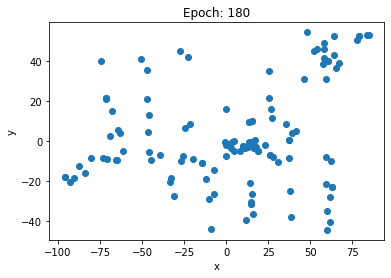

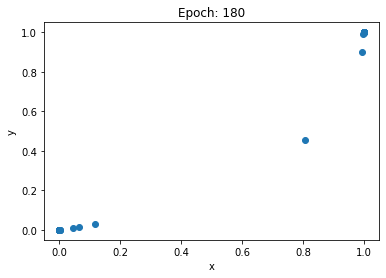

[TRAIN] Epoch:  180 , Batch:  0 , Loss:    -20.712766679636033 , Reconstruction loss:    -20.616595142520204 , KL Divergence:    0.09617153711583053


In [19]:
loss_history = []
elbo_hist = []
print_epochs = [1,5,25,50, 75, 90, 120, 150, 180]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(0, epoch):
    # testing
    test_dataset = create_batch_test(df_test)
    feed = {X_in: test_dataset}
    elbo, out, rec, kl, samp = sess.run([loss, output_mean, reconst_loss, kl_div, sample], feed)
    elbo_hist.append(-elbo)
    if e in print_epochs:
        print('[TEST]','Epoch: ', e, ', Loss:   ', np.mean(elbo), ', Reconstruction loss:   ', np.mean(rec), ', KL Divergence:   ', np.mean(kl))
        plt.scatter(test_dataset[:,0], test_dataset[:,1])
        plt.title("Epoch: "+str(e))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
        randoms = []
        for _ in range(128):
            random = np.random.normal(0, 1, latent_dimension)
            randoms.append(random)
        imgs = sess.run(output_mean, feed_dict = {sample: randoms})
        plt.scatter(imgs[:,0], imgs[:,1])
        plt.title("Epoch: "+str(e))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    # training
    train_dataset = create_batch(df_train)
    i = 0
    for batch in train_dataset:
        sess.run(optimize, feed_dict = {X_in: batch})
        l, o, r, k, s = sess.run([loss, output_mean, reconst_loss, kl_div, sample], feed_dict = {X_in: batch})   
        loss_history.append(-l)
        if e in print_epochs:
            if (i % 100) == 0:
                print('[TRAIN]', 'Epoch: ', e, ', Batch: ', i, ', Loss:   ', np.mean(l), ', Reconstruction loss:   ', np.mean(r), ', KL Divergence:   ', np.mean(k))
        i = i+1


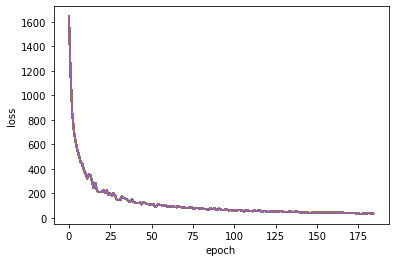

In [20]:
# plotting loss
for i in range(0, len(elbo_hist)):
    plt.plot(elbo_hist)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()